In [2]:
import numpy as np                                               ## Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r"C:\Users\tessl\Downloads\car_age_price.csv")

In [3]:
data.head()                                                      ## Reading and display values

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.info()                                                     ## Checking for datatype and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [7]:
data['Year'].unique()                                     ## How many uniques values are there

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014], dtype=int64)

In [8]:
data['Price'].unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000], dtype=int64)

In [17]:
corr_matrix=data.corr()                                    ## Doing corrilation

[]

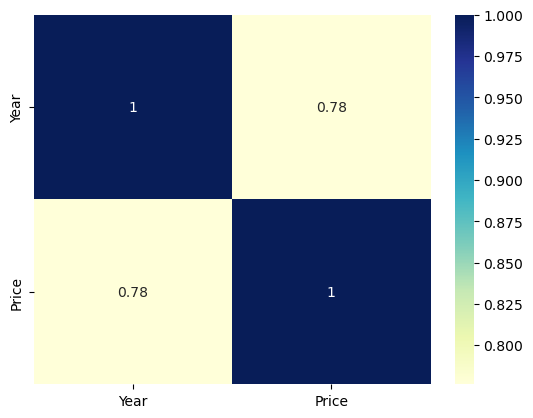

In [18]:
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')           ## Plotting heatmap
plt.plot()

In [23]:
x=data.drop(['Price'],axis=1)                      # Making price as target column
y=data['Price']

In [24]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [25]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split                     ## Splitting into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size=0.2)

In [27]:
from sklearn.linear_model import LinearRegression                       ## doing linear regression
linear_regression = LinearRegression()
model = linear_regression.fit(x_train,y_train)
predictions=model.predict(x_test)

In [29]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [28]:
from sklearn.metrics import mean_squared_error,r2_score                           # Finding mean square error and r square value
print('Mean Squared Error =',mean_squared_error(y_test,predictions))
print('R Squared Value = ', r2_score(y_test,predictions))

Mean Squared Error = 4326906256.829671
R Squared Value =  0.36759313425902185


## Here the mean squared error is large and r value is small. Ideally the mean squared error should be very small and r square value shoul be close to 1.so this is not a good model

## Lasso Regression

In [30]:
from sklearn.model_selection import train_test_split                     ## training and testing
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 42,test_size=0.2)

In [31]:
from sklearn.linear_model import Lasso                             ### doing lasso
model_lasso = Lasso(alpha=1.0)
model_lasso.fit(xtrain, ytrain)
predictions=model_lasso.predict(xtest)

In [33]:
from sklearn.metrics import mean_squared_error,r2_score                   
print('Mean Squared Error =',mean_squared_error(ytest,predictions))
print('R Squared Value = ', r2_score(ytest,predictions))

Mean Squared Error = 4326859771.015669
R Squared Value =  0.3675999284778446


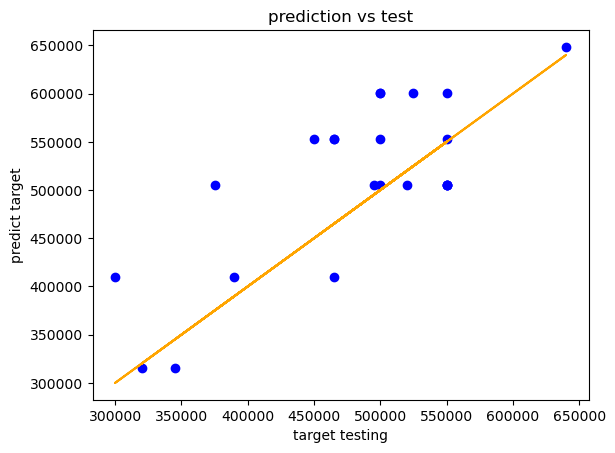

In [38]:
plt.scatter( ytest, predictions, color = 'blue' )                          ### graph to compare actual and prediction
plt.plot( ytest, ytest, color = 'orange' )
plt.title( 'prediction vs test' )
plt.xlabel( 'target testing' )
plt.ylabel( 'predict target' )
plt.show()

In [40]:
from collections import OrderedDict
newData = OrderedDict([('Year',2022)])
newData = pd.Series(newData).values.reshape(1,-1)
model.predict(newData)

C:\Users\tessl\anaconda3\New folder\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([743601.61594504])

In [42]:
model_lasso.predict(newData)

C:\Users\tessl\anaconda3\New folder\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([743599.37427144])